<a href="https://colab.research.google.com/github/DhivyaMadhavan/Retail_Sales_Prediction/blob/main/retail_sales_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import missingno
from sklearn.preprocessing import OrdinalEncoder

##loading datasets

In [ ]:
sales = pd.read_csv("/content/sales_data_set.csv")

In [ ]:
stores = pd.read_csv("/content/stores_data_set.csv")

In [ ]:
features = pd.read_csv("/content/features_data_set.csv")

In [ ]:
#get info abt sales dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
#get the ifo about the stores dataset
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
#get info abt features dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
#check the shape of the sales df
sales.shape

(421570, 5)

In [ ]:
#check the shape of the stores df
stores.shape

(45, 3)

In [ ]:
#check the shape of the features df
features.shape

(8190, 12)

##Sales Dataset

In [ ]:
sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [ ]:
sales.Store.values[3]

1

In [ ]:
sales.Store.isnull().sum()

0

In [ ]:
sales.Dept.values[0]

1

In [ ]:
sales.Dept.isnull().sum()

0

In [ ]:
sales.Date.values[0]

'05/02/2010'

In [ ]:
sales.Date.dtype

dtype('O')

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'])

<ipython-input-18-0ee97b05cfec>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])


In [ ]:
sales.Date.dtype

dtype('<M8[ns]')

In [ ]:
sales.Date.isnull().sum()

0

In [ ]:
sales.Weekly_Sales.values[0]

24924.5

In [ ]:
sales.Weekly_Sales.isnull().sum()

0

In [ ]:
sales.IsHoliday.values[0]

False

In [ ]:
sales.IsHoliday.isnull().sum()

0

In [ ]:
sales.duplicated().sum()

0

##features dataset

In [ ]:
features.shape

(8190, 12)

In [ ]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [ ]:
features.Store.values[0]

1

In [ ]:
features.Store.isnull().sum()

0

In [ ]:
features.Date.values[0]

'05/02/2010'

In [ ]:
features['Date'] = pd.to_datetime(features['Date'])

<ipython-input-31-eba2ff21f777>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  features['Date'] = pd.to_datetime(features['Date'])


In [ ]:
features.Date.isnull().sum()

0

In [ ]:
features.Temperature.values[0]

42.31

In [ ]:
features.Temperature.isnull().sum()

0

In [ ]:
features.Fuel_Price.values[0]

2.572

In [ ]:
features.Fuel_Price.isnull().sum()

0

In [ ]:
features.MarkDown1.values[100]

6277.39

In [ ]:
features.MarkDown1.isnull().sum()

4158

In [ ]:
features["MarkDown1"]=features["MarkDown1"].fillna(0)

In [ ]:
features.MarkDown1.isnull().sum()

0

In [ ]:
features.MarkDown1.values[1]

0.0

In [ ]:
features.MarkDown2.values[0]

nan

In [ ]:
features.MarkDown2.isnull().sum()

5269

In [ ]:
features["MarkDown2"]=features["MarkDown2"].fillna(0)

In [ ]:
features.MarkDown2.values[0]

0.0

In [ ]:
features.MarkDown3.values[0]

nan

In [ ]:
features.MarkDown3.isnull().sum()

4577

In [ ]:
features["MarkDown3"]=features["MarkDown3"].fillna(0)

In [ ]:
features.MarkDown3.isnull().sum()

0

In [ ]:
features.MarkDown3.values[0]

0.0

In [ ]:
features.MarkDown4.values[0]

nan

In [ ]:
features.MarkDown4.isnull().sum()

4726

In [ ]:
features["MarkDown4"]=features["MarkDown4"].fillna(0)

In [ ]:
features.MarkDown4.values[0]

0.0

In [ ]:
features.MarkDown4.isnull().sum()

0

In [ ]:
features.MarkDown5.values[0]

nan

In [ ]:
features.MarkDown5.isnull().sum()

4140

In [ ]:
features["MarkDown5"]=features["MarkDown5"].fillna(0)

In [ ]:
features.MarkDown5.values[0]

0.0

In [ ]:
features.MarkDown5.isnull().sum()

0

In [ ]:
features.CPI.values[0]

211.0963582

In [ ]:
features.CPI.isnull().sum()

585

In [ ]:
features["CPI"]=features["CPI"].fillna(0)

In [ ]:
features.CPI.isnull().sum()

0

In [ ]:
features.Unemployment.values[0]

8.106

In [ ]:
features.Unemployment.isnull().sum()

585

In [ ]:
features["Unemployment"]=features["Unemployment"].fillna(0)

In [ ]:
features.Unemployment.isnull().sum()

0

In [ ]:
features.duplicated().sum()

0

##store dataset

In [ ]:
stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [ ]:
stores.Store.values[0]

1

In [ ]:
stores.Store.isnull().sum()

0

In [ ]:
stores.Type.values[0]

'A'

In [ ]:
stores.Type.isnull().sum()

0

In [ ]:
stores.Size.values[0]

151315

In [ ]:
stores.Size.isnull().sum()

0

In [ ]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
stores.duplicated().sum()

0

##merging of datasets,type conversion

In [ ]:
sales_new = sales.copy()

In [ ]:
stores_new = stores.copy()

In [ ]:
features_new = features.copy()

In [ ]:
retail_df = pd.merge(sales_new,stores_new,on = ['Store'],how = "inner")

In [ ]:
retail_df = pd.merge(retail_df,features_new,on = ['Store','Date','IsHoliday'],how = "inner")

In [ ]:
retail_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [ ]:
float_to_int = ["Weekly_Sales","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment"]
for i in float_to_int:
    retail_df[i] = retail_df[i].astype(int)

dropping the rows where the weekly sales and Temperature is < 0

In [ ]:
retail_df[(retail_df['Weekly_Sales'] < 0)].count()

Store           1236
Dept            1236
Date            1236
Weekly_Sales    1236
IsHoliday       1236
Type            1236
Size            1236
Temperature     1236
Fuel_Price      1236
MarkDown1       1236
MarkDown2       1236
MarkDown3       1236
MarkDown4       1236
MarkDown5       1236
CPI             1236
Unemployment    1236
dtype: int64

In [ ]:
retail_df = retail_df.drop(retail_df.index[retail_df['Weekly_Sales'] < 0])

In [ ]:
retail_df = retail_df.drop(retail_df.index[retail_df['Temperature'] < 0])

In [ ]:
retail_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000,420267.000000
mean,22.198436,44.244694,16029.216453,136759.386109,59.603331,2.774727,2590.607604,878.731901,468.746050,1083.607752,1663.011983,170.715859,7.472443
std,12.786821,30.507916,22729.009860,60990.786947,18.439656,0.551527,6054.127944,5076.557273,5534.035387,3896.356963,4207.120868,39.156463,1.886298
min,1.000000,1.000000,0.000000,34875.000000,5.000000,2.000000,0.000000,-265.000000,-29.000000,0.000000,0.000000,126.000000,3.000000
25%,11.000000,18.000000,2116.000000,93638.000000,46.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,6.000000
50%,22.000000,37.000000,7658.000000,140167.000000,62.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.000000,7.000000
75%,33.000000,74.000000,20267.000000,202505.000000,74.000000,3.000000,2809.000000,2.000000,4.000000,425.000000,2169.000000,212.000000,8.000000
max,45.000000,99.000000,693099.000000,219622.000000,100.000000,4.000000,88646.000000,104519.000000,141630.000000,67474.000000,108519.000000,227.000000,14.000000


In [ ]:
retail_df.duplicated().sum()

0

In [ ]:
retail_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

#EDA

#### Store,Dept Vs Weekly_Sales

In [ ]:
retail_df['Year'] = retail_df['Date'].dt.year
retail_df['Month'] = retail_df['Date'].dt.month
retail_df['WeekOfYear'] = retail_df['Date'].dt.weekofyear
retail_df['DayName'] = retail_df['Date'].dt.day_name()

<ipython-input-94-9620d8822d3d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  retail_df['WeekOfYear'] = retail_df['Date'].dt.weekofyear


Text(0.5, 1.0, 'Store Vs Weeky_Sales')

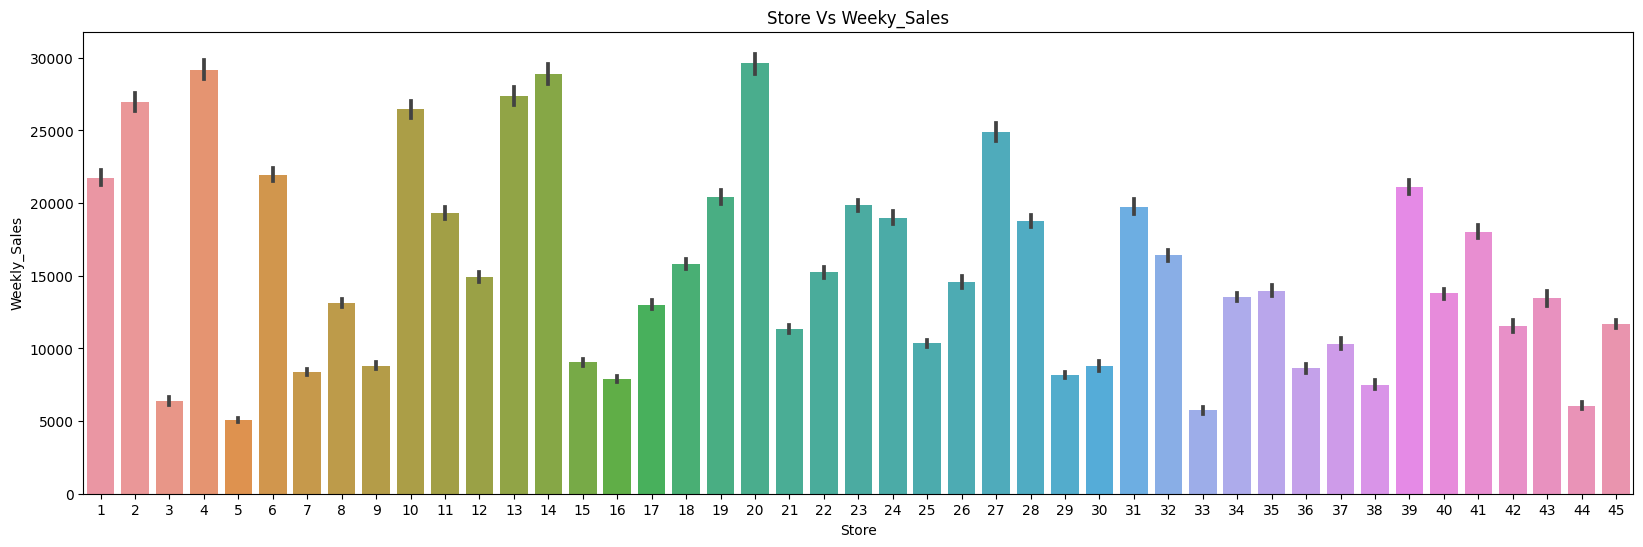

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=retail_df)
plt.title('Store Vs Weeky_Sales')

from the above graph we can say that there are 45 stores in total and out of that the stores 4 and 20 have good week sales followed by 13 and 14

In [ ]:
# Top performing stores in term of sales
df_top_stores = retail_df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,301396675
3,4,299540452
13,14,288997198


Text(0.5, 1.0, 'Dept Vs Weeky_Sales')

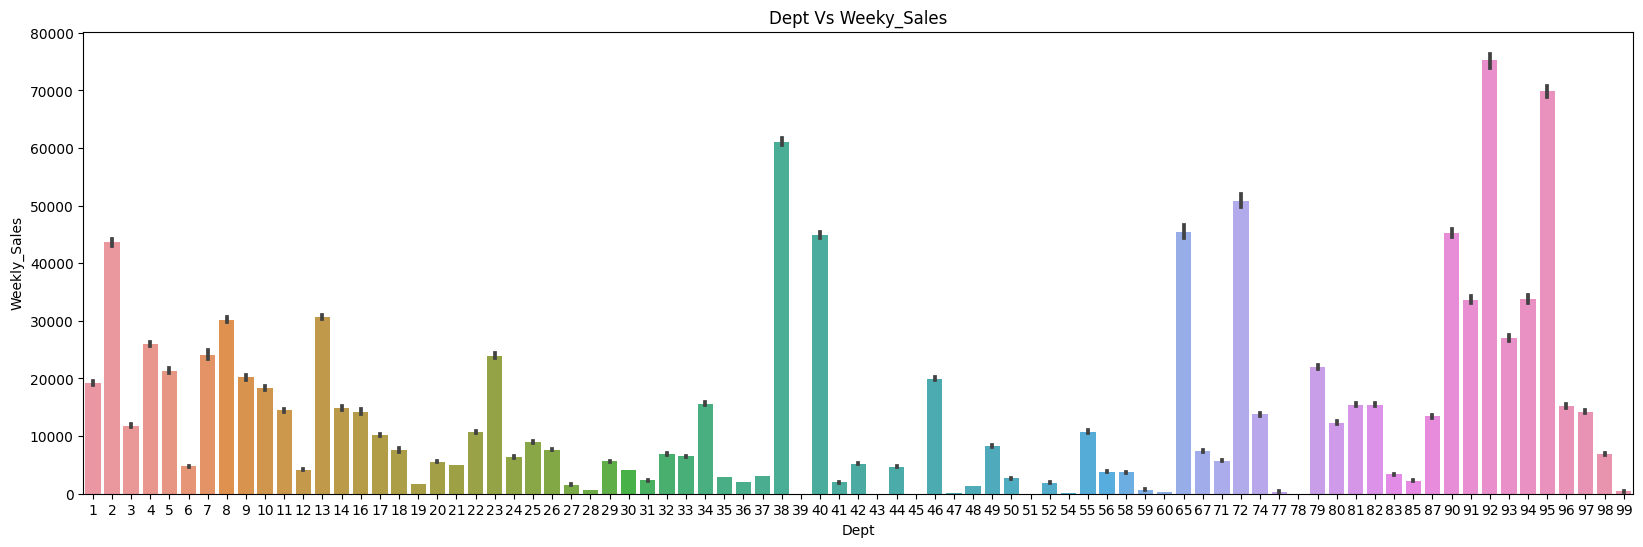

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=retail_df)
plt.title('Dept Vs Weeky_Sales')

There are 99 depatments and the graph shows that on an average department 92 and 95 have good weekly sales

#### Year,Month,Date & DayName Vs Weekly_Sales

In [ ]:
retail_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'WeekOfYear', 'DayName'],
      dtype='object')

Text(0.5, 1.0, 'Plot between Sales and Year')

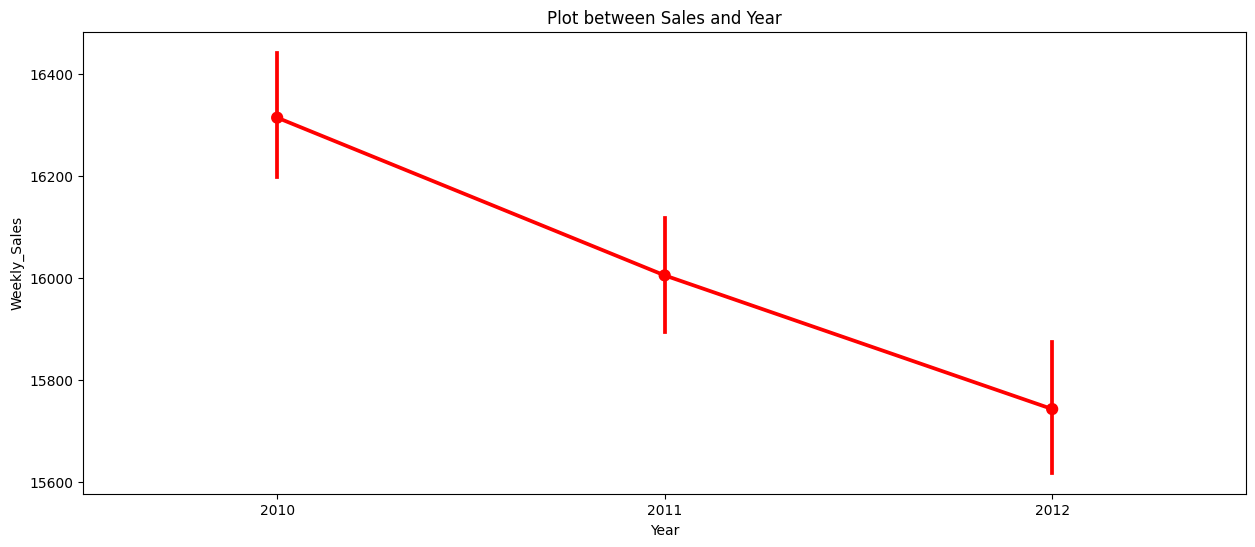

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Year', y= 'Weekly_Sales', data=retail_df,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Year')

In [ ]:
retail_df.groupby('Year')['Weekly_Sales'].mean()

Year
2010    16314.115147
2011    16005.240876
2012    15743.450714
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Plot between Sales and Month')

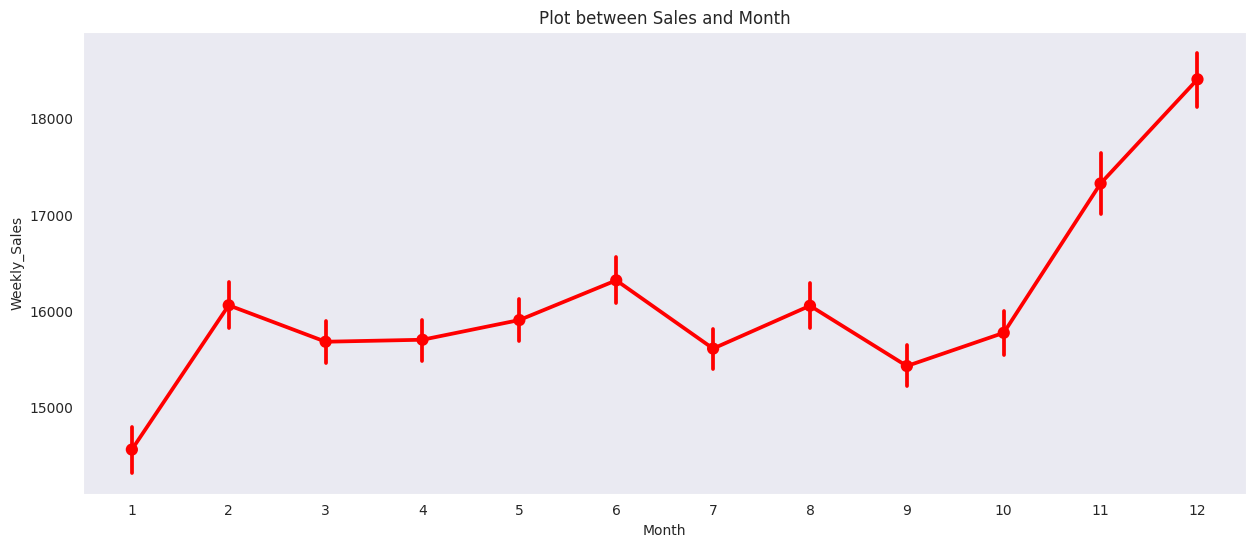

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Month', y= 'Weekly_Sales', data=retail_df,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Month')

from the graph it is seen that the weekly sales is high during november and december months

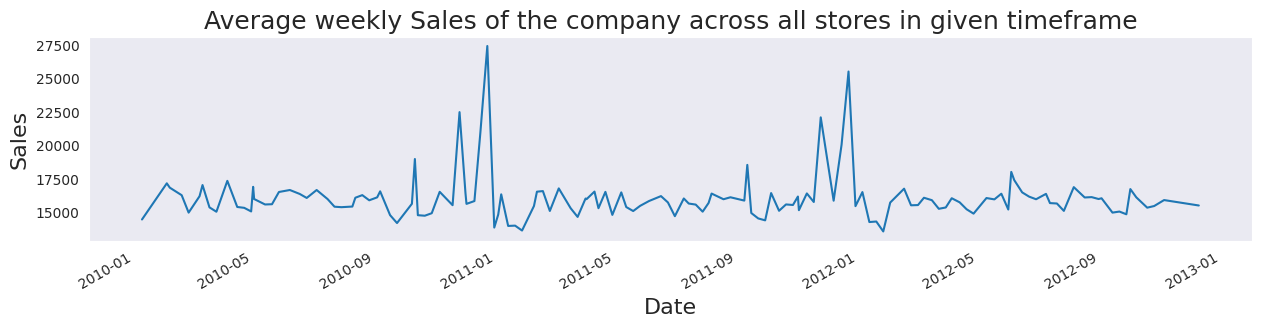

In [ ]:
plt.figure(figsize=(15,3))
retail_df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

In [ ]:
retail_df.groupby('WeekOfYear')['Weekly_Sales'].mean().sort_values(ascending=False).head()

WeekOfYear
51    26449.253559
47    22265.383723
50    18808.227558
23    17338.154160
14    16662.752911
Name: Weekly_Sales, dtype: float64

Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed.

In [ ]:
retail_df.groupby('DayName')['Weekly_Sales'].mean().sort_values(ascending=False)

DayName
Monday       16571.500000
Tuesday      16461.781195
Thursday     16202.019343
Sunday       16158.481724
Saturday     16083.654687
Friday       15897.845507
Wednesday    15789.350477
Name: Weekly_Sales, dtype: float64

Monday has more sales compared with others days and least is on Wednesday

<Axes: xlabel='Month'>

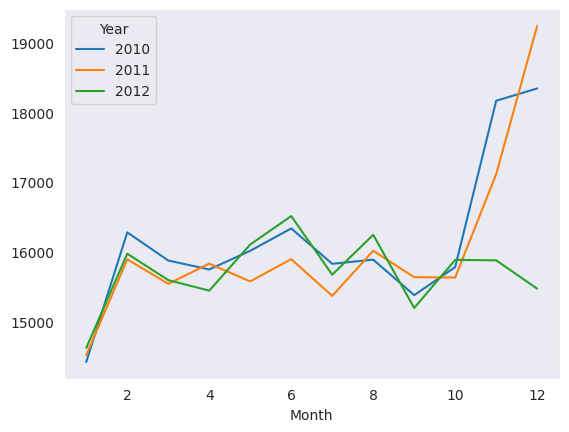

In [ ]:
monthly_sales = pd.pivot_table(retail_df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

from the graph it is seen that year 2011  has lowe sales compared with 2010 and 2012

#### Effects of Fuel Price, CPI , Unemployment , Temperature on Weekly_Sales

<Axes: xlabel='Fuel_Price'>

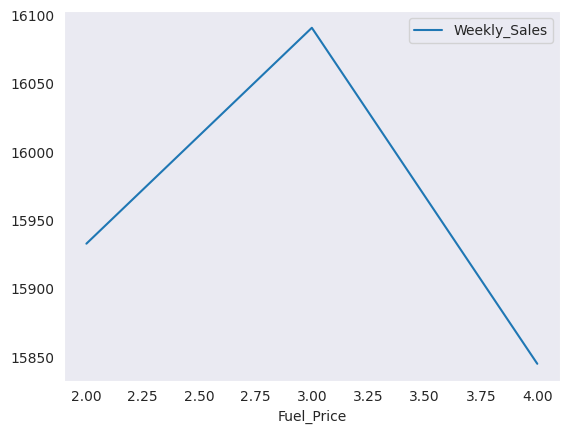

In [ ]:
temp = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "Fuel_Price")
temp.plot()

The graph shows that as the fuel price increases weekly sales decreases

<Axes: xlabel='Temperature'>

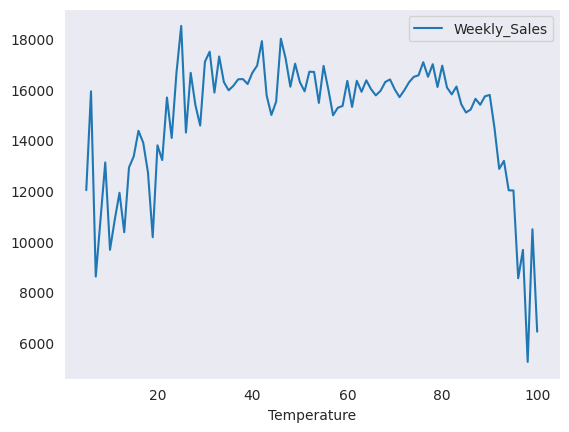

In [ ]:
temp = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

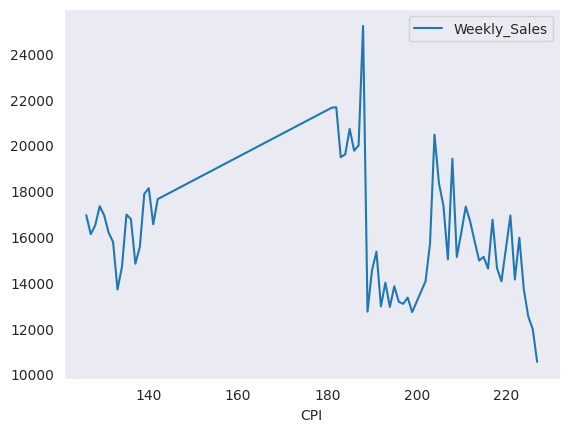

In [ ]:
temp = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "CPI")
temp.plot()

<Axes: xlabel='Unemployment'>

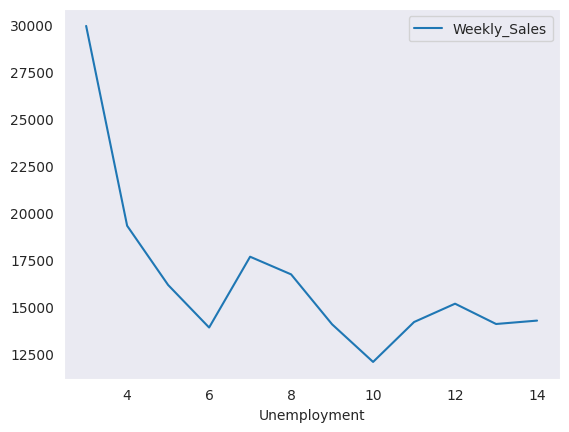

In [ ]:
unemp = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "Unemployment")
unemp.plot()

As the unemployment increases there is reduction in sales

In the above graph there is no CPI data betweeen 150 and 180

#### Markdown1-5 vs Weekly_Sales

<Axes: xlabel='MarkDown1'>

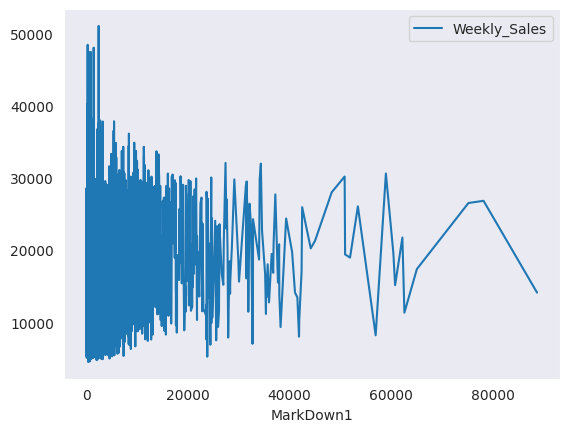

In [ ]:
cpi = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "MarkDown1")
cpi.plot()


<Axes: xlabel='MarkDown2'>

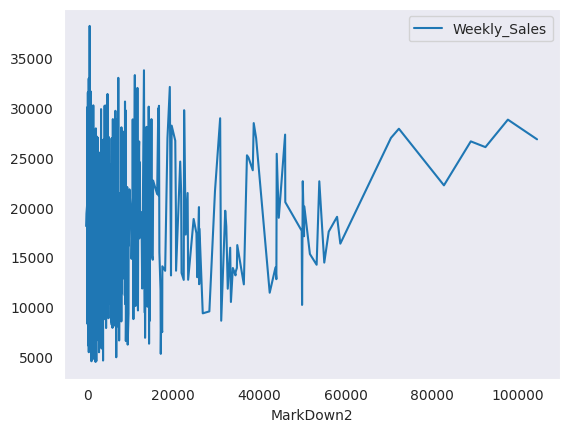

In [ ]:
cpi = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "MarkDown2")
cpi.plot()

<Axes: xlabel='MarkDown3'>

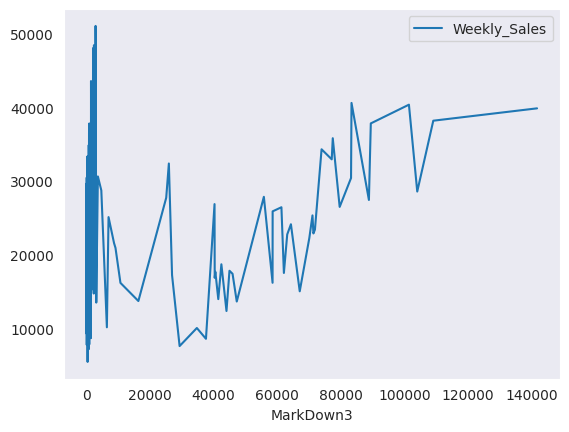

In [ ]:
cpi = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "MarkDown3")
cpi.plot()

<Axes: xlabel='MarkDown4'>

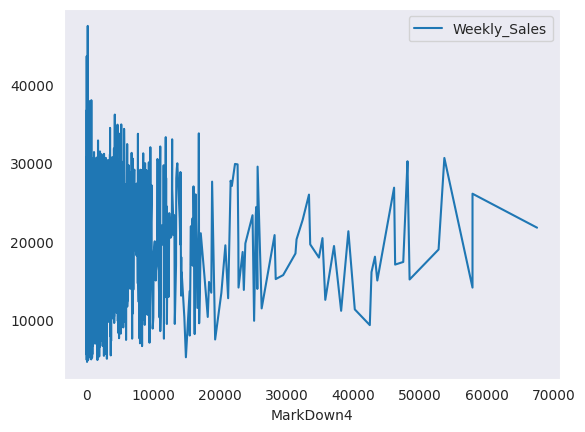

In [ ]:
cpi = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "MarkDown4")
cpi.plot()

<Axes: xlabel='MarkDown5'>

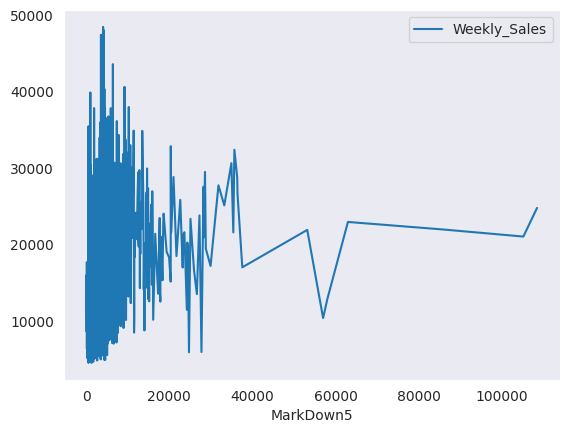

In [ ]:
cpi = pd.pivot_table(retail_df, values = "Weekly_Sales", index= "MarkDown5")
cpi.plot()


#### isholiday,size,type vs weekly sales

In [ ]:
retail_df.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'WeekOfYear', 'DayName'],
      dtype='object')

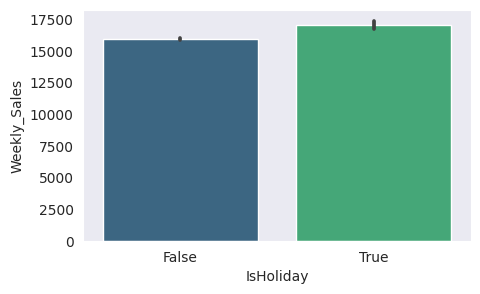

In [ ]:
plt.figure(figsize=(5, 3))
stateholiday_sales = sns.barplot(x="IsHoliday", y="Weekly_Sales", data=retail_df,palette='viridis')

Text(0.5, 1.0, 'Sales as per Type')

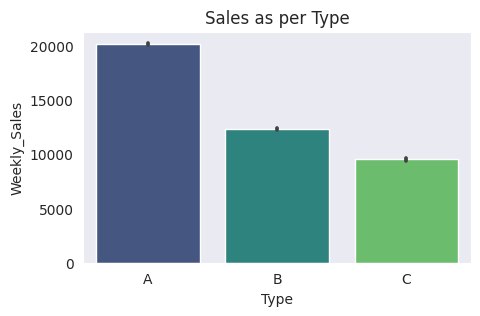

In [ ]:
plt.figure(figsize=(5, 3))
type_sales = sns.barplot(x="Type", y="Weekly_Sales", data=retail_df,palette='viridis')
plt.title("Sales as per Type")

In [ ]:
retail_df.groupby(['IsHoliday','Type'])['Weekly_Sales'].mean()

IsHoliday  Type
False      A       20053.025800
           B       12201.758835
           C        9544.384754
True       A       21332.420383
           B       13415.903161
           C        9561.817597
Name: Weekly_Sales, dtype: float64

In [ ]:
retail_df.to_csv("final_data.csv",index=False,encoding='utf-8')